<a href="https://colab.research.google.com/github/ChanulT/Bank-Marketing-ML-Analysis/blob/main/Bank-Marketing-Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let us first import the necessary libraries.

In [8]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

let's make the dataframes for training data and test data, we have already splitted the files beforehand for
convenience

In [9]:
#this is the main file with all the data for training
train = pd.read_csv("/content/drive/MyDrive/ML/bank-additional-full.csv", delimiter=';')
# this is the testing data, this file consists 10% of the data in the bank-additional-full.csv file
test = pd.read_csv("/content/drive/MyDrive/ML/bank-additional.csv",delimiter=';')

test = test[train.columns]

# view the data
print("Train Data:")
data_set = train
data_set



Train Data:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [10]:
#view the data
print("Test Data:")
data_set_test = test
data_set_test

Test Data:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


check the data types for all the columns

In [11]:
data_set.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


Let's search if data contains null values


In [12]:
print("\nMissing Values:")
print(data_set.isnull().sum())


Missing Values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


Upon observations, it could be seen that there are no null values instead null values there are columns are filled with the term "unknow"

Let us check for term "Unknow" in the columns, this can be checked by checking the possible values in each categorical column.

In [13]:
# Select categorical columns (object dtype)
categorical_columns = data_set.select_dtypes(include=['object']).columns

# Check for "unknown" in each categorical column
unknown_counts = {}
for column in categorical_columns:
    count = data_set[column].str.contains("unknown", na=False).sum()  # Count occurrences of "unknown"
    unknown_counts[column] = count

# Print the results
for col, count in unknown_counts.items():
    print(f"Column '{col}' has {count} occurrences of 'unknown'.")


Column 'job' has 330 occurrences of 'unknown'.
Column 'marital' has 80 occurrences of 'unknown'.
Column 'education' has 1731 occurrences of 'unknown'.
Column 'default' has 8597 occurrences of 'unknown'.
Column 'housing' has 990 occurrences of 'unknown'.
Column 'loan' has 990 occurrences of 'unknown'.
Column 'contact' has 0 occurrences of 'unknown'.
Column 'month' has 0 occurrences of 'unknown'.
Column 'day_of_week' has 0 occurrences of 'unknown'.
Column 'poutcome' has 0 occurrences of 'unknown'.
Column 'y' has 0 occurrences of 'unknown'.


Next, let's analyze our taget variable

In [14]:
print("\nClass Distribution:")
print(data_set['y'].value_counts())


Class Distribution:
y
no     36548
yes     4640
Name: count, dtype: int64


To decide whether to drop or impute the columns or rows with "unknow" term we need to find if there is a hidden connection between the columns and the output(y).

First let's calculate the 'yes' porportion of the target varaible

In [15]:
# Calculate the overall 'yes' rate in the target variable (assume target column is 'y')
overall_yes_rate = (data_set['y'].value_counts(normalize=True)['yes']) * 100

print(f"Overall 'Yes' Rate: {overall_yes_rate:.2f}%")


Overall 'Yes' Rate: 11.27%


Now let's identify the columns with the rows containing the term "unknown"

In [16]:
# Identify columns containing 'unknown' values
unknown_columns = [col for col in data_set.columns if 'unknown' in data_set[col].unique()]

print(f"Columns with 'unknown' values: {unknown_columns}")


Columns with 'unknown' values: ['job', 'marital', 'education', 'default', 'housing', 'loan']


For each column with 'unknown' values, calculate the proportion of 'yes' in rows where the column is 'unknown'. This helps us understand if these rows behave differently from the overall dataset.

In [17]:
# Analyze the 'yes' rate for rows where each column has 'unknown' values
unknown_analysis = {}
#Calculating and diplaying the proportion for each column
for col in unknown_columns:
    unknown_yes_rate = (data_set[data_set[col] == 'unknown']['y'].value_counts(normalize=True).get('yes', 0)) * 100
    unknown_analysis[col] = unknown_yes_rate
    print(f"{col}: 'Yes' Rate for 'unknown' rows = {unknown_yes_rate:.2f}%")


job: 'Yes' Rate for 'unknown' rows = 11.21%
marital: 'Yes' Rate for 'unknown' rows = 15.00%
education: 'Yes' Rate for 'unknown' rows = 14.50%
default: 'Yes' Rate for 'unknown' rows = 5.15%
housing: 'Yes' Rate for 'unknown' rows = 10.81%
loan: 'Yes' Rate for 'unknown' rows = 10.81%


Based on the calculated rates, decide whether to impute 'unknown' values with the most frequent value or delete the column entirely.

In [18]:
# Decide which columns to impute or delete
columns_to_impute = []
columns_to_delete = []

for col, unknown_yes_rate in unknown_analysis.items():
    if abs(unknown_yes_rate - overall_yes_rate) <= 2:
        columns_to_impute.append(col)
    else:
        columns_to_delete.append(col)

print(f"Columns to Impute: {columns_to_impute}")
print(f"Columns to Delete: {columns_to_delete}")


Columns to Impute: ['job', 'housing', 'loan']
Columns to Delete: ['marital', 'education', 'default']


Now, we impute the 'unknown' values for selected columns with the most frequent value. For columns with no significant variance, we drop them.

In [19]:
# Impute 'unknown' values for selected columns with the most frequent value
for col in columns_to_impute:
    most_frequent = data_set[col].mode()[0]
    data_set[col] = data_set[col].replace('unknown', most_frequent)

# Drop columns decided for deletion
data_set = data_set.drop(columns=columns_to_delete)

print("Data processing complete. Updated dataset:")
data_set


Data processing complete. Updated dataset:


,age,job,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Check for duplicate rows and and columns to drop

In [20]:
# Check for duplicate rows
print(f"Duplicate rows: {data_set.duplicated().sum()}")

# Check for duplicate columns
print(f"Duplicate columns: {data_set.T.duplicated().sum()}")


Duplicate rows: 21
Duplicate columns: 0


Even tho the data shows there are duplicate rows, there are not. this is becuase some rows contain same value for each columns.

Let us plot some graphs for EDA to indentify the relationship with target variable and the columns

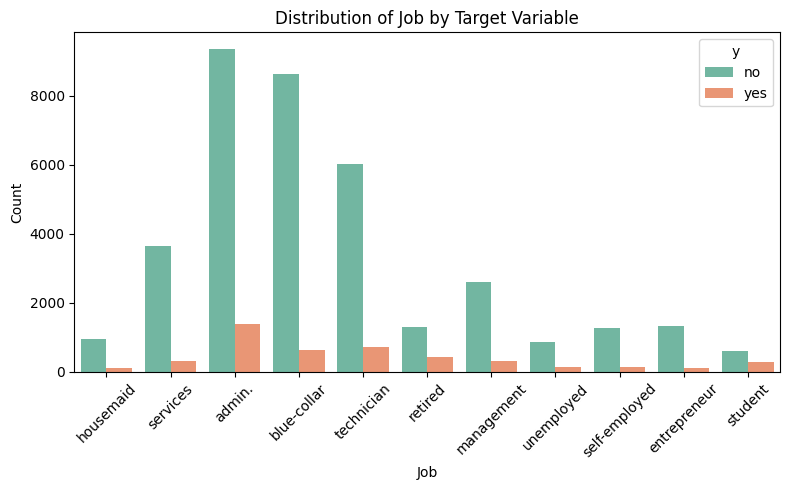

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data_set, x='job', hue='y', palette='Set2')
plt.title('Distribution of Job by Target Variable')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


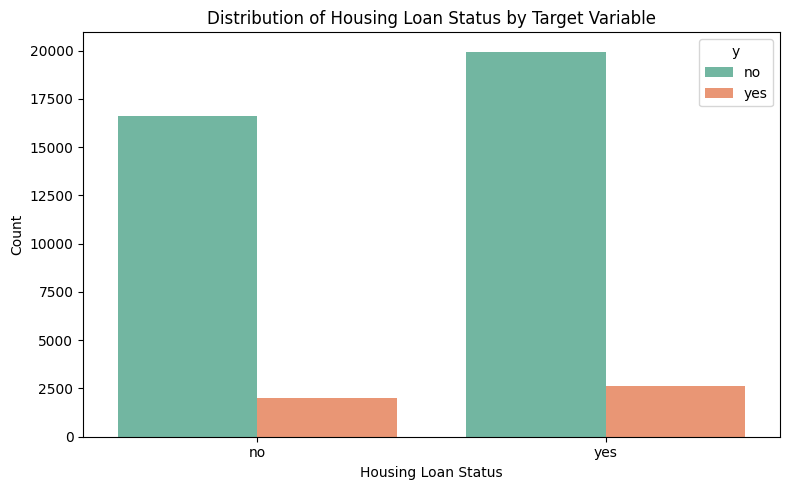

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data_set, x='housing', hue='y', palette='Set2')
plt.title('Distribution of Housing Loan Status by Target Variable')
plt.xlabel('Housing Loan Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


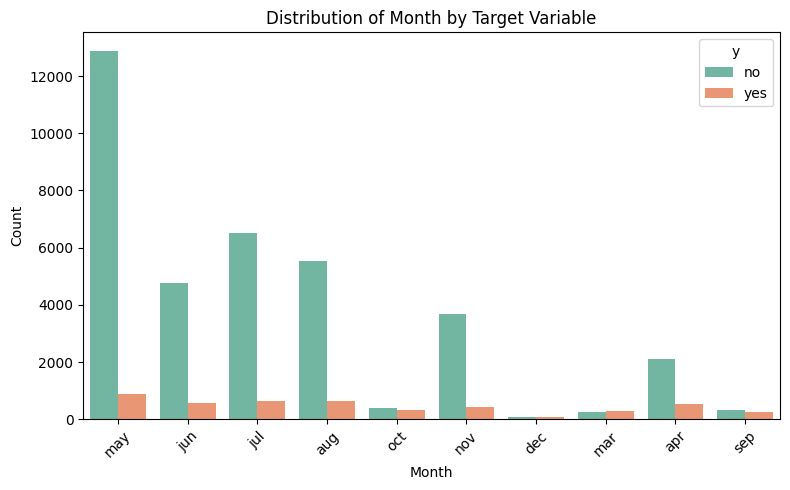

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data_set, x='month', hue='y', palette='Set2')
plt.title('Distribution of Month by Target Variable')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Target variable('y') was encoded into binary values, yes - 1 and no - 0.

In [24]:
print(data_set['y'].head())

# Encode target variable 'y' to binary
data_set['y'] = data_set['y'].map({'yes': 1, 'no': 0})
data_set_test['y'] = data_set_test['y'].map({'yes': 1, 'no': 0})

print(data_set['y'].head())


0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object
0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64


Duration column can be dropped since it has no effect of the target varible, duration value is not knows until the empolyee finishes the call with client.

In [25]:
# Drop the 'duration' column from the dataset
data_set = data_set.drop(columns=['duration'], errors='ignore')
data_set


,age,job,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


Let us plot a correlation heat map to identify the relationship between the numerical columns of the dataset and the target variable.

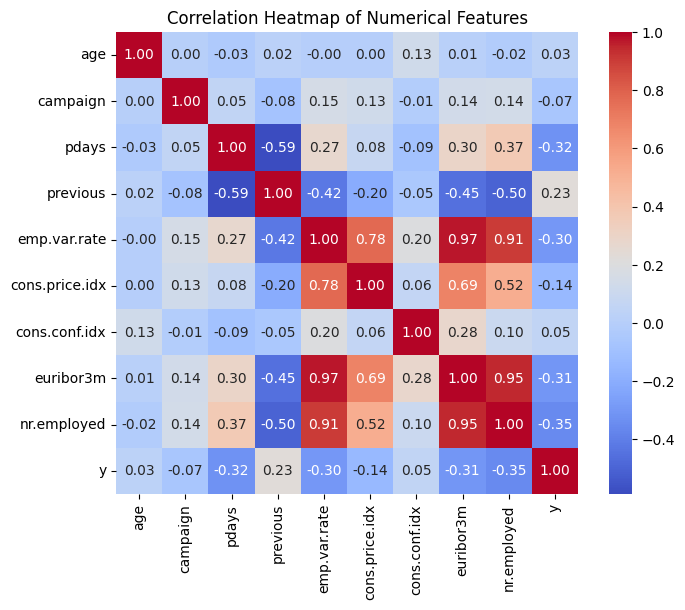

In [26]:
# Extract numerical columns
numerical_columns = data_set.select_dtypes(include=['int64', 'float64'])
numerical_columns['y'] = data_set['y']

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True
)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

We can also calculate the covariance values of the continuous functions with the target varaible.

In [27]:
# Extract numerical columns
numerical_columns = data_set.select_dtypes(include=['int64', 'float64'])

# Compute covariance of continuous variables with the target variable `y`
covariance_with_y = numerical_columns.cov()['y']

# Display the covariance values
print("Covariance of Continuous Features with Target Variable 'y':")
print(covariance_with_y)

Covariance of Continuous Features with Target Variable 'y':
age                0.100162
campaign          -0.058116
pdays            -19.201231
previous           0.036017
emp.var.rate      -0.148181
cons.price.idx    -0.024929
cons.conf.idx      0.080304
euribor3m         -0.168778
nr.employed       -8.102276
y                  0.099966
Name: y, dtype: float64


If the covarince value is greater than zero it shows a strog direct relationship between the variables and the values lesser than zero shows inverse relationship between the variables. we can confirm these negative values furture with logistics regression

In [28]:
import statsmodels.api as sm
# Select only numerical columns and the target variable
numerical_columns = data_set.select_dtypes(include=['int64', 'float64']).drop(columns=['y'])

# Add a constant (for the intercept term in the logistic regression)
X = sm.add_constant(numerical_columns)  # Independent variables
y = data_set['y']  # Target variable

# Fit the logistic regression model
logistic_model = sm.Logit(y, X)
result = logistic_model.fit()

# Print the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.287265
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41178
Method:                           MLE   Df Model:                            9
Date:                Tue, 31 Dec 2024   Pseudo R-squ.:                  0.1840
Time:                        20:03:28   Log-Likelihood:                -11832.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -20.2671     13.324     -1.521      0.128     -46.383       5.848
age              

'pdays' column has the lowest coefficient, this does not imply that it has no effect on the target; rather, it appears insignificant in this context. Therefore, the 'pdays' column can be removed from the dataset.

In [29]:
# Drop the 'duration' column from the dataset
data_set = data_set.drop(columns=['pdays'], errors='ignore')
data_set


,age,job,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,yes,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,no,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,yes,no,cellular,nov,fri,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,no,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


One Hot Encoding was used to generate binary columns for every categorical value

In [30]:
# Identify categorical columns
categorical_columns = data_set.select_dtypes(include=['object']).columns

# One-Hot Encoding for Categorical Variables
data_set = pd.get_dummies(data_set, columns=categorical_columns, drop_first=True)
data_set_test = pd.get_dummies(data_set_test, columns=categorical_columns, drop_first=True)

# Align train and test datasets (to ensure same features after encoding)
data_set, data_set_test = data_set.align(data_set_test, join='inner', axis=1)

data_set


,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,False,...,True,False,False,False,True,False,False,False,True,False
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0,False,...,True,False,False,False,True,False,False,False,True,False
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0,False,...,True,False,False,False,True,False,False,False,True,False
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,0,False,...,True,False,False,False,True,False,False,False,True,False
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,False,...,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,False,...,False,True,False,False,False,False,False,False,True,False
41184,46,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,True,...,False,True,False,False,False,False,False,False,True,False
41185,56,2,0,-1.1,94.767,-50.8,1.028,4963.6,0,False,...,False,True,False,False,False,False,False,False,True,False
41186,44,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,False,...,False,True,False,False,False,False,False,False,True,False


Min-Max scaling is done for the numerical columns to ensure all the featurers contribute equally for the final machine learning models.This also helps preserve relationships for the values.

In [31]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns from the dataset
numerical_columns = data_set.select_dtypes(include=['int64', 'float64']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test datasets
data_set[numerical_columns] = scaler.fit_transform(data_set[numerical_columns])
data_set_test[numerical_columns] = scaler.transform(data_set_test[numerical_columns])

# Check the scaled datasets
print("Scaled Training Data:")
data_set



Scaled Training Data:


,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0.481481,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0.0,False,...,True,False,False,False,True,False,False,False,True,False
1,0.493827,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0.0,False,...,True,False,False,False,True,False,False,False,True,False
2,0.246914,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0.0,False,...,True,False,False,False,True,False,False,False,True,False
3,0.283951,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0.0,False,...,True,False,False,False,True,False,False,False,True,False
4,0.481481,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0.0,False,...,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.000000,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,1.0,False,...,False,True,False,False,False,False,False,False,True,False
41184,0.358025,0.000000,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,0.0,True,...,False,True,False,False,False,False,False,False,True,False
41185,0.481481,0.018182,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,0.0,False,...,False,True,False,False,False,False,False,False,True,False
41186,0.333333,0.000000,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,1.0,False,...,False,True,False,False,False,False,False,False,True,False


Now let's implement the neural netowrk model using the dataset we preprocessed

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Separate features and target variable
X_train = data_set.drop(columns=["y"])
y_train = data_set["y"]
X_test = data_set_test.drop(columns=["y"])
y_test = data_set_test["y"]
# Define the neural network model
mlp_model = MLPClassifier(
    hidden_layer_sizes=( 64, 32, 16),  # Hidden layers with decreasing neurons
    activation='relu',                 # ReLU activation function
    solver='adam',                     # Adam optimizer
    max_iter=500,                      # Maximum iterations
    random_state=42,                   # Ensures reproducibility
    verbose=False                       # Print training progress
)
# Train the model
mlp_model.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9352

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      3668
         1.0       0.83      0.51      0.63       451

    accuracy                           0.94      4119
   macro avg       0.89      0.75      0.80      4119
weighted avg       0.93      0.94      0.93      4119


Confusion Matrix:
[[3622   46]
 [ 221  230]]


For furture improvments, let us perform hyperparameter tuning with the help of 'GridSearchCV' from the library 'sklearn'

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the MLPClassifier with a fixed random state for reproducibility
mlp_model = MLPClassifier(max_iter=300, random_state=42)

# Define a smaller hyperparameter grid for optimization
param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (64, 32, 16)],  # Fewer combinations
    'activation': ['relu', 'tanh'],  # Common activation functions
    'solver': ['adam'],  # Focusing on one efficient optimizer
    'learning_rate_init': [0.001, 0.01],  # Limited learning rate values
}

# Use GridSearchCV with 2-fold cross-validation for faster evaluation
grid_search = GridSearchCV(
    estimator=mlp_model,
    param_grid=param_grid,
    cv=2,  # Reduced folds
    n_jobs=-1,  # Use all CPU cores
    verbose=2  # Display progress
)

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Output the best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

# Predict on the test data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (64, 32, 16), 'learning_rate_init': 0.01, 'solver': 'adam'}
Best Cross-Validation Score: 0.5393

Test Accuracy: 0.9249817916970139

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      3668
         1.0       0.83      0.39      0.54       451

    accuracy                           0.92      4119
   macro avg       0.88      0.69      0.75      4119
weighted avg       0.92      0.92      0.91      4119



Next, let's implement random forest classification model

In [34]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate features and target variable for training and testing datasets
X_train = data_set.drop('y', axis=1)
y_train = data_set['y']
X_test = data_set_test.drop('y', axis=1)    # Same as above for test data
y_test = data_set_test['y']

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,        # Number of trees in the forest
    max_depth=None,          # Maximum depth of the tree (default: None, grow until all leaves are pure)
    random_state=42,         # Ensures reproducibility
    min_samples_split=2,     # Minimum number of samples required to split an internal node
    min_samples_leaf=1       # Minimum number of samples required to be at a leaf node
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9852

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3668
         1.0       0.98      0.88      0.93       451

    accuracy                           0.99      4119
   macro avg       0.98      0.94      0.96      4119
weighted avg       0.99      0.99      0.98      4119


Confusion Matrix:
[[3661    7]
 [  54  397]]


For furture improvments, let us perform hyperparameter tuning with the help of 'GridSearchCV' from the library 'sklearn'

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Define the parameter distribution
param_dist = {
    'n_estimators': [50, 100, 200],      # Number of trees
    'max_depth': [10, 20, None],         # Maximum depth of trees
    'min_samples_split': [2, 5, 10],     # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],       # Minimum samples at a leaf node
}

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,             # Number of parameter settings sampled
    scoring='accuracy',    # Using accuracy as the metric
    cv=3,                  # Cross-validation folds
    random_state=42,       # Ensures reproducibility
    n_jobs=-1,             # Use all CPU cores
    verbose=1              # Monitor progress
)

# Fit RandomizedSearchCV to training data
random_search.fit(X_train, y_train)

# Get the best parameters and the corresponding model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print detailed classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
Accuracy: 0.9148

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      3668
         1.0       0.80      0.30      0.43       451

    accuracy                           0.91      4119
   macro avg       0.86      0.64      0.69      4119
weighted avg       0.91      0.91      0.90      4119


Confusion Matrix:
[[3634   34]
 [ 317  134]]


AOC- ROC curve

Let's use the roc_curve and auc functions to calculate the False Positive Rate (FPR), True Positive Rate (TPR), and Area Under the Curve (AUC).

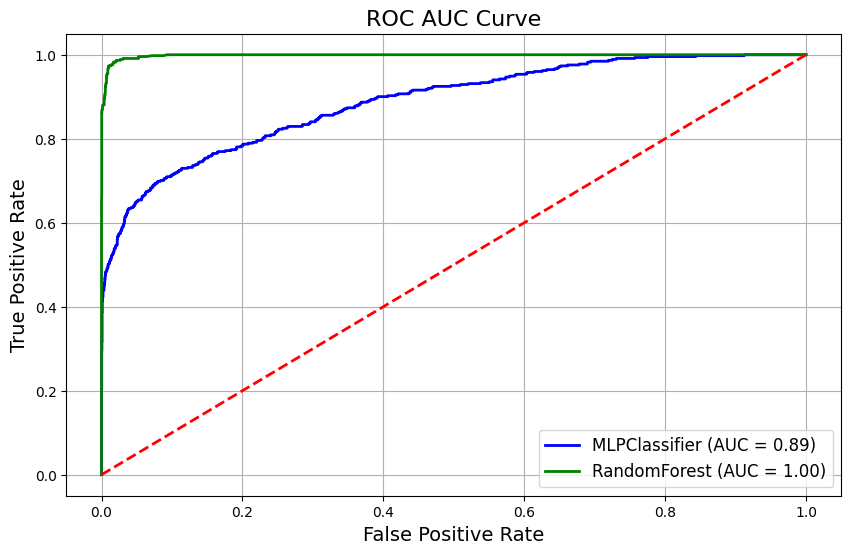

In [36]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define Neural Network (MLPClassifier)
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32, 16),  # Example architecture
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

# Define Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# Train both models on training data
mlp_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Generate predicted probabilities for the positive class
mlp_y_pred_proba = mlp_model.predict_proba(X_test)[:, 1]
rf_y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC Curve and AUC for both models
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp_y_pred_proba)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_y_pred_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_mlp, tpr_mlp, label=f"MLPClassifier (AUC = {roc_auc_mlp:.2f})", lw=2, color='blue')
plt.plot(fpr_rf, tpr_rf, label=f"RandomForest (AUC = {roc_auc_rf:.2f})", lw=2, color='green')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)

plt.title('ROC AUC Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()


It is visible that the random forest classification has the highest rank compared to neural network model.